In [39]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [5]:
filename = "/var/ellie/data/cifar10_tfr/eval.tfrecords"
DEPTH = 3
HEIGHT = 32
WIDTH = 32

In [6]:
dataset = tf.data.TFRecordDataset(filename)

In [7]:
def parser(serialized_example):
    """Parses a single tf.Example into image and label tensors."""
    # Dimensions of the images in the CIFAR-10 dataset.
    # See http://www.cs.toronto.edu/~kriz/cifar.html for a description of the
    # input format.
    features = tf.parse_single_example(
        serialized_example,
        features={
            'image': tf.FixedLenFeature([], tf.string),
            'label': tf.FixedLenFeature([], tf.int64),
        })
    image = tf.decode_raw(features['image'], tf.uint8)
    image.set_shape([DEPTH * HEIGHT * WIDTH])

    # Reshape from [depth * height * width] to [depth, height, width].
    image = tf.cast(
        tf.transpose(tf.reshape(image, [DEPTH, HEIGHT, WIDTH]), [1, 2, 0]),
        tf.float32)
    label = tf.cast(features['label'], tf.int32)

    return image, label

In [8]:
dataset = dataset.map(parser)

In [9]:
dataset = dataset.repeat(1).batch(10)

In [18]:
dataset

<BatchDataset shapes: ((?, 32, 32, 3), (?,)), types: (tf.float32, tf.int32)>

In [24]:
iterator = dataset.make_one_shot_iterator()
c_features, _labels = iterator.get_next()

In [25]:
c_features

<tf.Tensor 'IteratorGetNext_1:0' shape=(?, 32, 32, 3) dtype=float32>

In [46]:
g_features = tf.reduce_mean(c_features, axis=3)

In [11]:
sess = tf.InteractiveSession()

In [27]:
c_feats = sess.run(c_features)

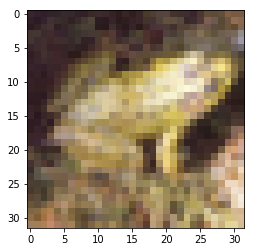

In [28]:
plt.imshow(c_feats[9]/256)
plt.show()

In [44]:
gray=np.mean(c_feats, axis=3)
gray.shape

(10, 32, 32)

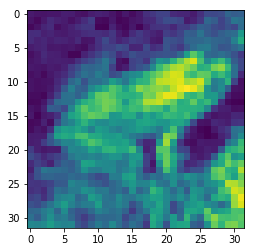

In [45]:
plt.imshow(gray[9]/256)
plt.show()

In [14]:
from simple_convnet import SimpleConvnet

In [47]:
net = SimpleConvnet('channels_last', 32, 32, 1, 10)

In [48]:
init_op = tf.global_variables_initializer()
fwd_pass=net.fwd_pass(g_features, training=False)

In [49]:
sess.run([init_op, fwd_pass])

FailedPreconditionError: Attempting to use uninitialized value conv1_12/kernel
	 [[Node: conv1_12/kernel/read = Identity[T=DT_FLOAT, _class=["loc:@conv1_12/kernel"], _device="/job:localhost/replica:0/task:0/device:CPU:0"](conv1_12/kernel)]]

Caused by op 'conv1_12/kernel/read', defined at:
  File "/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/wgiersche/Project-Ellie/capsnet-fashion/tf15/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/wgiersche/Project-Ellie/capsnet-fashion/tf15/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/wgiersche/Project-Ellie/capsnet-fashion/tf15/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/Users/wgiersche/Project-Ellie/capsnet-fashion/tf15/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/Users/wgiersche/Project-Ellie/capsnet-fashion/tf15/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/wgiersche/Project-Ellie/capsnet-fashion/tf15/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/Users/wgiersche/Project-Ellie/capsnet-fashion/tf15/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/wgiersche/Project-Ellie/capsnet-fashion/tf15/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/Users/wgiersche/Project-Ellie/capsnet-fashion/tf15/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/wgiersche/Project-Ellie/capsnet-fashion/tf15/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/wgiersche/Project-Ellie/capsnet-fashion/tf15/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/wgiersche/Project-Ellie/capsnet-fashion/tf15/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/wgiersche/Project-Ellie/capsnet-fashion/tf15/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/wgiersche/Project-Ellie/capsnet-fashion/tf15/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/wgiersche/Project-Ellie/capsnet-fashion/tf15/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/wgiersche/Project-Ellie/capsnet-fashion/tf15/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/wgiersche/Project-Ellie/capsnet-fashion/tf15/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-48-392a184b917d>", line 2, in <module>
    fwd_pass=net.fwd_pass(g_features, training=False)
  File "/Users/wgiersche/Project-Ellie/capsnet-fashion/layers_estimator/simple_convnet.py", line 56, in fwd_pass
    y = self.conv(n_fields=32, size_fields=5, name="conv1")(y)
  File "/Users/wgiersche/Project-Ellie/capsnet-fashion/tf15/lib/python3.6/site-packages/tensorflow/python/layers/base.py", line 680, in __call__
    self.build(input_shapes)
  File "/Users/wgiersche/Project-Ellie/capsnet-fashion/tf15/lib/python3.6/site-packages/tensorflow/python/layers/convolutional.py", line 143, in build
    dtype=self.dtype)
  File "/Users/wgiersche/Project-Ellie/capsnet-fashion/tf15/lib/python3.6/site-packages/tensorflow/python/layers/base.py", line 533, in add_variable
    partitioner=partitioner)
  File "/Users/wgiersche/Project-Ellie/capsnet-fashion/tf15/lib/python3.6/site-packages/tensorflow/python/ops/variable_scope.py", line 1297, in get_variable
    constraint=constraint)
  File "/Users/wgiersche/Project-Ellie/capsnet-fashion/tf15/lib/python3.6/site-packages/tensorflow/python/ops/variable_scope.py", line 1093, in get_variable
    constraint=constraint)
  File "/Users/wgiersche/Project-Ellie/capsnet-fashion/tf15/lib/python3.6/site-packages/tensorflow/python/ops/variable_scope.py", line 439, in get_variable
    constraint=constraint)
  File "/Users/wgiersche/Project-Ellie/capsnet-fashion/tf15/lib/python3.6/site-packages/tensorflow/python/ops/variable_scope.py", line 408, in _true_getter
    use_resource=use_resource, constraint=constraint)
  File "/Users/wgiersche/Project-Ellie/capsnet-fashion/tf15/lib/python3.6/site-packages/tensorflow/python/ops/variable_scope.py", line 800, in _get_single_variable
    use_resource=use_resource)
  File "/Users/wgiersche/Project-Ellie/capsnet-fashion/tf15/lib/python3.6/site-packages/tensorflow/python/ops/variable_scope.py", line 2157, in variable
    use_resource=use_resource)
  File "/Users/wgiersche/Project-Ellie/capsnet-fashion/tf15/lib/python3.6/site-packages/tensorflow/python/ops/variable_scope.py", line 2147, in <lambda>
    previous_getter = lambda **kwargs: default_variable_creator(None, **kwargs)
  File "/Users/wgiersche/Project-Ellie/capsnet-fashion/tf15/lib/python3.6/site-packages/tensorflow/python/ops/variable_scope.py", line 2130, in default_variable_creator
    constraint=constraint)
  File "/Users/wgiersche/Project-Ellie/capsnet-fashion/tf15/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 233, in __init__
    constraint=constraint)
  File "/Users/wgiersche/Project-Ellie/capsnet-fashion/tf15/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 381, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "/Users/wgiersche/Project-Ellie/capsnet-fashion/tf15/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 132, in identity
    return gen_array_ops.identity(input, name=name)
  File "/Users/wgiersche/Project-Ellie/capsnet-fashion/tf15/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 2051, in identity
    "Identity", input=input, name=name)
  File "/Users/wgiersche/Project-Ellie/capsnet-fashion/tf15/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Users/wgiersche/Project-Ellie/capsnet-fashion/tf15/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3259, in create_op
    op_def=op_def)
  File "/Users/wgiersche/Project-Ellie/capsnet-fashion/tf15/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1650, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value conv1_12/kernel
	 [[Node: conv1_12/kernel/read = Identity[T=DT_FLOAT, _class=["loc:@conv1_12/kernel"], _device="/job:localhost/replica:0/task:0/device:CPU:0"](conv1_12/kernel)]]


In [55]:
from mnist_dataset import train_input_fn as mnist_train_input_fn

In [56]:
mnist_train = mnist_train_input_fn("/tmp/mnist_data", 128, 1)

In [57]:
mnist_train()

<RepeatDataset shapes: ((?, 784), (?,)), types: (tf.float32, tf.int32)>

In [58]:
from cifar10_dataset import train_input_fn as cifar10_train_input_fn

In [59]:
cifar10_train = cifar10_train_input_fn("/var/ellie/data/cifar10_tfr", 128, 1)

In [61]:
cifar10_train()

<RepeatDataset shapes: (?,), types: tf.string>

In [63]:
ds = cifar10_train()

In [64]:
iter = ds.make_one_shot_iterator()

In [67]:
iter.get_next()

<tf.Tensor 'IteratorGetNext_2:0' shape=(?,) dtype=string>

In [68]:
sess.run(iter.get_next()[0])

b'\n\xa3\x18\n\x0e\n\x05label\x12\x05\x1a\x03\n\x01\x06\n\x90\x18\n\x05image\x12\x86\x18\n\x83\x18\n\x80\x18sonmklnklpmpsmjjimomkillkkpvhloo\x83\x80uwqnlfm\x8crwm`SW_lw]QIMJIOj\x8fT\\am\x84vx\x86\x80\x80z\x88\x9f\xa7\x8d\x9f\x81j]UZ^bZBCBEY_N]TLKh}^dz\x80\x8b\x8b\x86\x95\x93\x98\xb4\xa5\x8d\x89y[PSaY?AFluKA:>=d{xp`Zz\x89\x7f\x7f\x99\xa1\xa7\xb1\xa3\x9e\x9azWQ_iRBS\x8e\x93\x84@7G9bskmg[cwo~\x93\x9e\x8a\x8b\x88\x83\x8d\x8f}XOUqv\x92\xba\xac\xaahUZ>bg_p\xa5\x9a]hm\x94\x8a\x88\x88\x87\x89|rvw_\\ry\xa0\xd4\xcc\xb0\xb3\x9c\x92l:bd\x7f\xa1\xb0\x9etZ\x80\x9b\x8c\xa1\x95\x81~sou\x80}|\x9c\x84\x82\xc5\xd2\xae\xb4\xac\xaaw:b\\o\x90\x95bad\xa3\xbc\xa9\xa1zxwus{\x82\x7f\x83\xaa\x9eq\x94\xb2\x97\xae\xa4\x95o<b]b\x86\x95\x82\x82\x82\xa2\xa4\x8b}t\x7fzuyzz\x83\x97\x9c\x8ae\x83\xa9\x95\xa5\xaa\xa0h9bss\x8e\xad\xac\x85\x84\x89\x83qwsxx\x7f~~\x85\x80\x89\x89{Yr\xaa\xa1\xa1\x8d\x87u>b|\x8b\x85\xa8\xbc\x9c\x8b\x7fxx\x83tt\x81\x88\x89\x8e\x95\x96|\x84\x8aln\x90\x90\x8a\x84\x81|<b}\x86\x82\xaa\xa9\x9c\x92\x8